In [ ]:
import numpy as np
import keras
import pandas as pd
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K
from keras.utils.np_utils import to_categorical 
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import matplotlib.pyplot as plt
import warnings
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.metrics import multilabel_confusion_matrix
warnings.filterwarnings('ignore')

# Preprocess

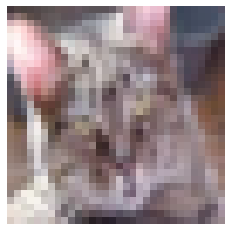

In [ ]:
# input image dimensions
img_rows, img_cols = 32, 32
num_classes = 10
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

x_train.shape
img = x_train[5]
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255.0
x_test /= 255.0
x_val /= 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

# Model Performance Functions

In [ ]:
def evaluate(cnn_model):
  scoreTrain = cnn_model.evaluate(x_train, y_train, verbose=1)
  print('Train loss:', scoreTrain[0])
  print('Train accuracy:', scoreTrain[1])

  scoreVal = cnn_model.evaluate(x_val, y_val, verbose=1)
  print('Validation loss:', scoreVal[0])
  print('Validation accuracy:', scoreVal[1])

  scoreTest = cnn_model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scoreTest[0])
  print('Test accuracy:', scoreTest[1])
  return scoreTest[1]

In [ ]:
def plot_model_performance(history_model):
  pyplot.plot()
  pyplot.title('Classification Accuracy')
  pyplot.plot(history_model.history['accuracy'], color='darkblue', label='train')
  pyplot.plot(history_model.history['val_accuracy'], color='orange', label='test');

# Data Augmentation, initialize variables and Callback function

In [ ]:
batch_size = 128
epochs = 80

In [ ]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
)

datagenTrain = datagen.flow(x_train, y_train, batch_size=batch_size, seed=499)

datagenVal = ImageDataGenerator()
datagenValidation = datagenVal.flow(x_val, y_val, batch_size= 64, seed= 499)


In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, verbose=1)

# Without Dropout and without BatchNormalization without Data Augmentation


In [ ]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape = input_shape))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         1

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=15, verbose=1, validation_data=(x_val, y_val), batch_size=batch_size)

Epoch 1/15
313/313 [==============================] - 15s 40ms/step - loss: 1.9579 - accuracy: 0.2645 - val_loss: 1.4917 - val_accuracy: 0.4446
Epoch 2/15
313/313 [==============================] - 11s 37ms/step - loss: 1.3967 - accuracy: 0.4841 - val_loss: 1.1658 - val_accuracy: 0.5754
Epoch 3/15
313/313 [==============================] - 12s 37ms/step - loss: 1.1227 - accuracy: 0.5976 - val_loss: 1.0169 - val_accuracy: 0.6378
Epoch 4/15
313/313 [==============================] - 11s 37ms/step - loss: 0.9540 - accuracy: 0.6576 - val_loss: 0.9422 - val_accuracy: 0.6715
Epoch 5/15
313/313 [==============================] - 11s 37ms/step - loss: 0.8411 - accuracy: 0.7008 - val_loss: 0.8772 - val_accuracy: 0.6855
Epoch 6/15
313/313 [==============================] - 11s 37ms/step - loss: 0.7532 - accuracy: 0.7347 - val_loss: 0.7790 - val_accuracy: 0.7299
Epoch 7/15
313/313 [==============================] - 11s 36ms/step - loss: 0.6497 - accuracy: 0.7684 - val_loss: 0.7253 - val_accuracy:

In [ ]:
modelTest = evaluate(model)

1250/1250 [==============================] - 8s 6ms/step - loss: 0.1332 - accuracy: 0.9549
Train loss: 0.1332038789987564
Train accuracy: 0.9549000263214111
313/313 [==============================] - 2s 7ms/step - loss: 0.8378 - accuracy: 0.7786
Validation loss: 0.8377791047096252
Validation accuracy: 0.7785999774932861
313/313 [==============================] - 2s 7ms/step - loss: 0.8732 - accuracy: 0.7700
Test loss: 0.8732258081436157
Test accuracy: 0.7699999809265137


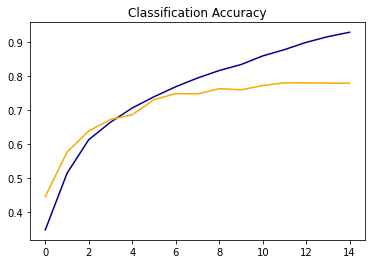

In [ ]:
plot_model_performance(history)

# Without Dropout and without BatchNormalization

In [ ]:
K.clear_session()
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape = input_shape))
model_1.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(256, activation="relu"))
model_1.add(Dense(num_classes, activation="softmax"))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         1

In [ ]:
model_1.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(datagenTrain, epochs=epochs, verbose=1, validation_data=datagenValidation, callbacks=[callback])

Epoch 1/80
313/313 [==============================] - 34s 106ms/step - loss: 2.0422 - accuracy: 0.2337 - val_loss: 1.5602 - val_accuracy: 0.4188
Epoch 2/80
313/313 [==============================] - 33s 105ms/step - loss: 1.6278 - accuracy: 0.3994 - val_loss: 1.4494 - val_accuracy: 0.4866
Epoch 3/80
313/313 [==============================] - 32s 104ms/step - loss: 1.4349 - accuracy: 0.4774 - val_loss: 1.2401 - val_accuracy: 0.5502
Epoch 4/80
313/313 [==============================] - 32s 102ms/step - loss: 1.3224 - accuracy: 0.5178 - val_loss: 1.2071 - val_accuracy: 0.5750
Epoch 5/80
313/313 [==============================] - 32s 102ms/step - loss: 1.2150 - accuracy: 0.5650 - val_loss: 1.2168 - val_accuracy: 0.5802
Epoch 6/80
313/313 [==============================] - 33s 104ms/step - loss: 1.1636 - accuracy: 0.5842 - val_loss: 1.0539 - val_accuracy: 0.6226
Epoch 7/80
313/313 [==============================] - 32s 103ms/step - loss: 1.1014 - accuracy: 0.6059 - val_loss: 0.9783 - val_ac

In [ ]:
model_1Test = evaluate(model_1)

1250/1250 [==============================] - 8s 6ms/step - loss: 0.3042 - accuracy: 0.8926
Train loss: 0.30422070622444153
Train accuracy: 0.8925999999046326
313/313 [==============================] - 2s 7ms/step - loss: 0.5092 - accuracy: 0.8329
Validation loss: 0.509209394454956
Validation accuracy: 0.8328999876976013
313/313 [==============================] - 2s 7ms/step - loss: 0.5186 - accuracy: 0.8321
Test loss: 0.5185501575469971
Test accuracy: 0.832099974155426


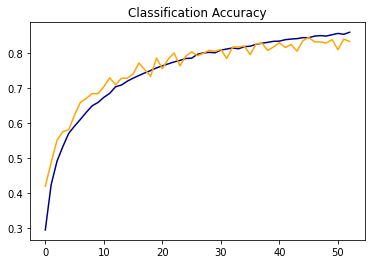

In [ ]:
plot_model_performance(history_1)

# Without Dropout and with BatchNormalization 

In [ ]:
K.clear_session()
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape = input_shape))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(BatchNormalization())
model_2.add(AveragePooling2D(pool_size=(2,2)))
model_2.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(BatchNormalization())
model_2.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(BatchNormalization())
model_2.add(AveragePooling2D(pool_size=(2,2)))
model_2.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(BatchNormalization())
model_2.add(AveragePooling2D(pool_size=(2,2)))
model_2.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(BatchNormalization())
model_2.add(AveragePooling2D(pool_size=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(256, activation="relu"))
model_2.add(BatchNormalization())
model_2.add(Dense(num_classes, activation="softmax"))
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

In [ ]:
model_2.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit(datagenTrain, epochs=epochs, verbose=1, validation_data=datagenValidation, callbacks=[callback])

Epoch 1/80
313/313 [==============================] - 36s 109ms/step - loss: 1.8599 - accuracy: 0.3493 - val_loss: 3.1442 - val_accuracy: 0.1920
Epoch 2/80
313/313 [==============================] - 34s 109ms/step - loss: 1.3516 - accuracy: 0.5121 - val_loss: 1.0817 - val_accuracy: 0.6065
Epoch 3/80
313/313 [==============================] - 33s 107ms/step - loss: 1.1470 - accuracy: 0.5911 - val_loss: 1.2493 - val_accuracy: 0.5936
Epoch 4/80
313/313 [==============================] - 33s 105ms/step - loss: 1.0099 - accuracy: 0.6448 - val_loss: 0.9949 - val_accuracy: 0.6610
Epoch 5/80
313/313 [==============================] - 33s 104ms/step - loss: 0.8916 - accuracy: 0.6870 - val_loss: 0.9288 - val_accuracy: 0.6950
Epoch 6/80
313/313 [==============================] - 34s 107ms/step - loss: 0.8076 - accuracy: 0.7180 - val_loss: 0.8891 - val_accuracy: 0.7042
Epoch 7/80
313/313 [==============================] - 33s 105ms/step - loss: 0.7241 - accuracy: 0.7461 - val_loss: 0.8994 - val_ac

In [ ]:
model_2Test = evaluate(model_2)

1250/1250 [==============================] - 11s 8ms/step - loss: 0.2961 - accuracy: 0.9005
Train loss: 0.29608720541000366
Train accuracy: 0.900475025177002
313/313 [==============================] - 3s 9ms/step - loss: 0.5197 - accuracy: 0.8440
Validation loss: 0.5196813344955444
Validation accuracy: 0.843999981880188
313/313 [==============================] - 3s 9ms/step - loss: 0.5094 - accuracy: 0.8419
Test loss: 0.5094279646873474
Test accuracy: 0.8418999910354614


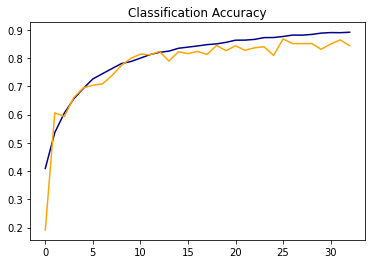

In [ ]:
plot_model_performance(history_2)

# With Dropout-BatchNormalization

In [ ]:
K.clear_session()
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape = input_shape))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.1))
model_3.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_3.add(BatchNormalization())
model_3.add(AveragePooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.1))
model_3.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.1))
model_3.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_3.add(BatchNormalization())
model_3.add(AveragePooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_3.add(BatchNormalization())
model_3.add(AveragePooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_3.add(BatchNormalization())
model_3.add(AveragePooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))
model_3.add(Flatten())
model_3.add(Dense(256, activation="relu"))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))
model_3.add(Dense(num_classes, activation="softmax"))
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0

In [ ]:
model_3.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics=["accuracy"])

In [ ]:
history_3 = model_3.fit(datagenTrain, epochs=epochs, verbose=1, validation_data=datagenValidation, callbacks=[callback])

Epoch 1/80
313/313 [==============================] - 37s 112ms/step - loss: 2.1183 - accuracy: 0.2976 - val_loss: 2.9291 - val_accuracy: 0.1519
Epoch 2/80
313/313 [==============================] - 34s 110ms/step - loss: 1.5337 - accuracy: 0.4575 - val_loss: 1.1638 - val_accuracy: 0.5835
Epoch 3/80
313/313 [==============================] - 34s 109ms/step - loss: 1.3088 - accuracy: 0.5334 - val_loss: 1.5114 - val_accuracy: 0.5186
Epoch 4/80
313/313 [==============================] - 33s 105ms/step - loss: 1.1630 - accuracy: 0.5898 - val_loss: 1.0042 - val_accuracy: 0.6611
Epoch 5/80
313/313 [==============================] - 35s 111ms/step - loss: 1.0453 - accuracy: 0.6311 - val_loss: 1.0308 - val_accuracy: 0.6549
Epoch 6/80
313/313 [==============================] - 34s 108ms/step - loss: 0.9715 - accuracy: 0.6575 - val_loss: 0.9076 - val_accuracy: 0.6920
Epoch 7/80
313/313 [==============================] - 33s 107ms/step - loss: 0.9010 - accuracy: 0.6870 - val_loss: 0.9525 - val_ac

In [ ]:
model_3Test = evaluate(model_3)

1250/1250 [==============================] - 11s 8ms/step - loss: 0.2339 - accuracy: 0.9197
Train loss: 0.2339276671409607
Train accuracy: 0.9197250008583069
313/313 [==============================] - 3s 9ms/step - loss: 0.3795 - accuracy: 0.8755
Validation loss: 0.3794642388820648
Validation accuracy: 0.8755000233650208
313/313 [==============================] - 3s 9ms/step - loss: 0.3919 - accuracy: 0.8713
Test loss: 0.39186161756515503
Test accuracy: 0.8712999820709229


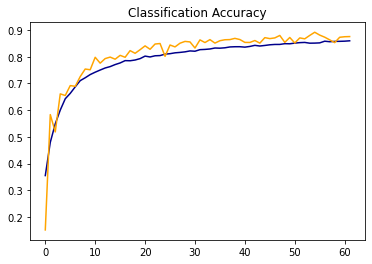

In [ ]:
plot_model_performance(history_3)

# Less Pooling Layer 

In [ ]:
K.clear_session()
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape = input_shape))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.1))
model_4.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.1))
model_4.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_4.add(BatchNormalization())
model_4.add(AveragePooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.1))
model_4.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.2))
model_4.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.2))
model_4.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_4.add(BatchNormalization())
model_4.add(AveragePooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.2))
model_4.add(Flatten())
model_4.add(Dense(256, activation="relu"))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.3))
model_4.add(Dense(num_classes, activation="softmax"))
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        3

In [ ]:
model_4.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics=["accuracy"])

In [ ]:
history_4 = model_4.fit(datagenTrain, epochs=epochs, verbose=1, validation_data=datagenValidation, callbacks=[callback])

Epoch 1/80
313/313 [==============================] - 41s 124ms/step - loss: 2.0845 - accuracy: 0.3199 - val_loss: 3.6019 - val_accuracy: 0.1415
Epoch 2/80
313/313 [==============================] - 38s 122ms/step - loss: 1.4533 - accuracy: 0.4905 - val_loss: 1.0554 - val_accuracy: 0.6251
Epoch 3/80
313/313 [==============================] - 39s 123ms/step - loss: 1.2313 - accuracy: 0.5615 - val_loss: 1.0312 - val_accuracy: 0.6454
Epoch 4/80
313/313 [==============================] - 39s 124ms/step - loss: 1.0881 - accuracy: 0.6110 - val_loss: 0.9036 - val_accuracy: 0.6923
Epoch 5/80
313/313 [==============================] - 39s 125ms/step - loss: 0.9832 - accuracy: 0.6578 - val_loss: 0.8338 - val_accuracy: 0.7094
Epoch 6/80
313/313 [==============================] - 39s 123ms/step - loss: 0.9190 - accuracy: 0.6767 - val_loss: 0.7929 - val_accuracy: 0.7245
Epoch 7/80
313/313 [==============================] - 38s 122ms/step - loss: 0.8572 - accuracy: 0.7012 - val_loss: 0.8136 - val_ac

In [ ]:
model_4Test = evaluate(model_4)

1250/1250 [==============================] - 12s 9ms/step - loss: 0.2148 - accuracy: 0.9258
Train loss: 0.21477828919887543
Train accuracy: 0.9258249998092651
313/313 [==============================] - 3s 10ms/step - loss: 0.3758 - accuracy: 0.8763
Validation loss: 0.37578439712524414
Validation accuracy: 0.8762999773025513
313/313 [==============================] - 3s 10ms/step - loss: 0.3777 - accuracy: 0.8756
Test loss: 0.37770718336105347
Test accuracy: 0.8755999803543091


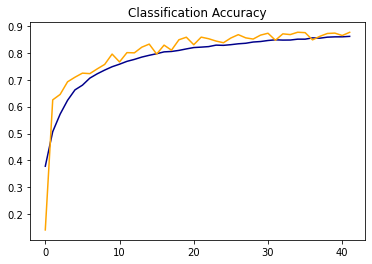

In [ ]:
plot_model_performance(history_4)

# More Neuron 


In [ ]:
K.clear_session()
model_5 = Sequential()
model_5.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape = input_shape))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.1))
model_5.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(BatchNormalization())
model_5.add(AveragePooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.1))
model_5.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.1))
model_5.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(BatchNormalization())
model_5.add(AveragePooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.2))
model_5.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(BatchNormalization())
model_5.add(AveragePooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.2))
model_5.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(BatchNormalization())
model_5.add(AveragePooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.2))
model_5.add(Flatten())
model_5.add(Dense(512, activation="relu"))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Dense(num_classes, activation="softmax"))
model_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0

In [ ]:
model_5.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(datagenTrain, epochs=epochs, verbose=1, validation_data=datagenValidation, callbacks=[callback])

Epoch 1/80
313/313 [==============================] - 37s 112ms/step - loss: 2.2395 - accuracy: 0.2890 - val_loss: 3.0223 - val_accuracy: 0.1607
Epoch 2/80
313/313 [==============================] - 35s 110ms/step - loss: 1.5934 - accuracy: 0.4420 - val_loss: 1.2258 - val_accuracy: 0.5539
Epoch 3/80
313/313 [==============================] - 34s 108ms/step - loss: 1.3585 - accuracy: 0.5293 - val_loss: 0.9922 - val_accuracy: 0.6477
Epoch 4/80
313/313 [==============================] - 34s 107ms/step - loss: 1.1994 - accuracy: 0.5798 - val_loss: 0.9854 - val_accuracy: 0.6633
Epoch 5/80
313/313 [==============================] - 33s 106ms/step - loss: 1.0713 - accuracy: 0.6238 - val_loss: 0.8706 - val_accuracy: 0.6959
Epoch 6/80
313/313 [==============================] - 35s 110ms/step - loss: 0.9940 - accuracy: 0.6542 - val_loss: 0.7927 - val_accuracy: 0.7286
Epoch 7/80
313/313 [==============================] - 34s 108ms/step - loss: 0.9041 - accuracy: 0.6829 - val_loss: 0.7199 - val_ac

In [ ]:
model_5Test = evaluate(model_5)

1250/1250 [==============================] - 11s 8ms/step - loss: 0.2397 - accuracy: 0.9176
Train loss: 0.23972070217132568
Train accuracy: 0.9176250100135803
313/313 [==============================] - 3s 9ms/step - loss: 0.3820 - accuracy: 0.8734
Validation loss: 0.38201355934143066
Validation accuracy: 0.8733999729156494
313/313 [==============================] - 3s 9ms/step - loss: 0.4015 - accuracy: 0.8671
Test loss: 0.4015023410320282
Test accuracy: 0.8671000003814697


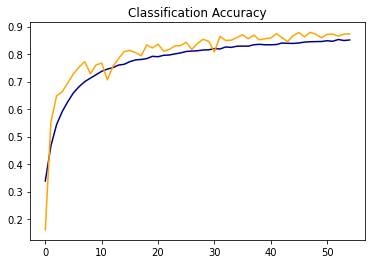

In [ ]:
plot_model_performance(history_5)

# Extra Hidden Layer

In [ ]:
K.clear_session()
model_6 = Sequential()
model_6.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape = input_shape))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.1))
model_6.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_6.add(BatchNormalization())
model_6.add(AveragePooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.1))
model_6.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.1))
model_6.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_6.add(BatchNormalization())
model_6.add(AveragePooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.2))
model_6.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_6.add(BatchNormalization())
model_6.add(AveragePooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.2))
model_6.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_6.add(BatchNormalization())
model_6.add(AveragePooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.2))
model_6.add(Flatten())
model_6.add(Dense(256, activation="relu"))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.3))
model_6.add(Dense(128, activation="relu"))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.3))
model_6.add(Dense(num_classes, activation="softmax"))
model_6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0

In [ ]:
model_6.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics=["accuracy"])

In [ ]:
history_6 = model_6.fit(datagenTrain, epochs=epochs, verbose=1, validation_data=datagenValidation, callbacks=[callback] )

Epoch 1/80
313/313 [==============================] - 38s 114ms/step - loss: 2.2328 - accuracy: 0.2599 - val_loss: 2.6970 - val_accuracy: 0.2225
Epoch 2/80
313/313 [==============================] - 35s 111ms/step - loss: 1.6067 - accuracy: 0.4229 - val_loss: 1.4375 - val_accuracy: 0.5036
Epoch 3/80
313/313 [==============================] - 34s 109ms/step - loss: 1.3876 - accuracy: 0.5033 - val_loss: 1.3426 - val_accuracy: 0.5540
Epoch 4/80
313/313 [==============================] - 34s 108ms/step - loss: 1.2515 - accuracy: 0.5538 - val_loss: 1.1365 - val_accuracy: 0.6123
Epoch 5/80
313/313 [==============================] - 34s 107ms/step - loss: 1.1269 - accuracy: 0.6023 - val_loss: 1.0456 - val_accuracy: 0.6406
Epoch 6/80
313/313 [==============================] - 34s 110ms/step - loss: 1.0411 - accuracy: 0.6337 - val_loss: 0.8748 - val_accuracy: 0.6968
Epoch 7/80
313/313 [==============================] - 34s 108ms/step - loss: 0.9726 - accuracy: 0.6592 - val_loss: 0.9468 - val_ac

In [ ]:
model_6Test = evaluate(model_6)

1250/1250 [==============================] - 9s 7ms/step - loss: 0.2285 - accuracy: 0.9209
Train loss: 0.228529691696167
Train accuracy: 0.9208999872207642
313/313 [==============================] - 3s 8ms/step - loss: 0.3573 - accuracy: 0.8798
Validation loss: 0.3573155701160431
Validation accuracy: 0.879800021648407
313/313 [==============================] - 3s 8ms/step - loss: 0.3768 - accuracy: 0.8741
Test loss: 0.37677592039108276
Test accuracy: 0.8741000294685364


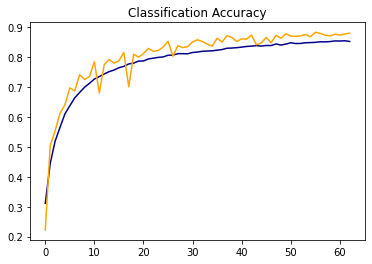

In [ ]:
plot_model_performance(history_6)

# Comparision Performance

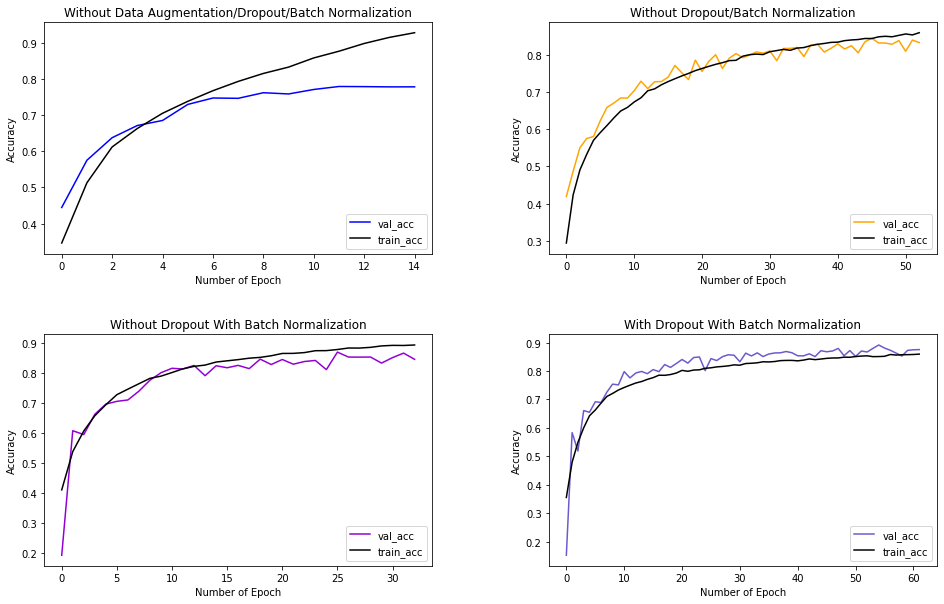

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.plot(history.history['val_accuracy'], color='blue', label='val_acc')
plt.plot(history.history['accuracy'], color='black', label='train_acc')
plt.title('Without Data Augmentation/Dropout/Batch Normalization')
plt.legend(loc='lower right')
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")

plt.subplot(2,2,2)
plt.plot(history_1.history['val_accuracy'], color='orange', label='val_acc')
plt.plot(history_1.history['accuracy'], color='black', label='train_acc')
plt.title('Without Dropout/Batch Normalization')
plt.legend(loc='lower right')
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")

plt.subplot(2,2,3)
plt.plot(history_2.history['val_accuracy'], color='darkviolet', label='val_acc')
plt.plot(history_2.history['accuracy'], color='black', label='train_acc')
plt.title('Without Dropout With Batch Normalization')
plt.legend(loc='lower right')
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")

plt.subplot(2,2,4)
plt.plot(history_3.history['val_accuracy'], color='slateblue', label='val_acc')
plt.plot(history_3.history['accuracy'], color='black', label='train_acc')
plt.title('With Dropout With Batch Normalization')
plt.legend(loc='lower right')
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")

plt.subplots_adjust(wspace=0.30, hspace=0.35)

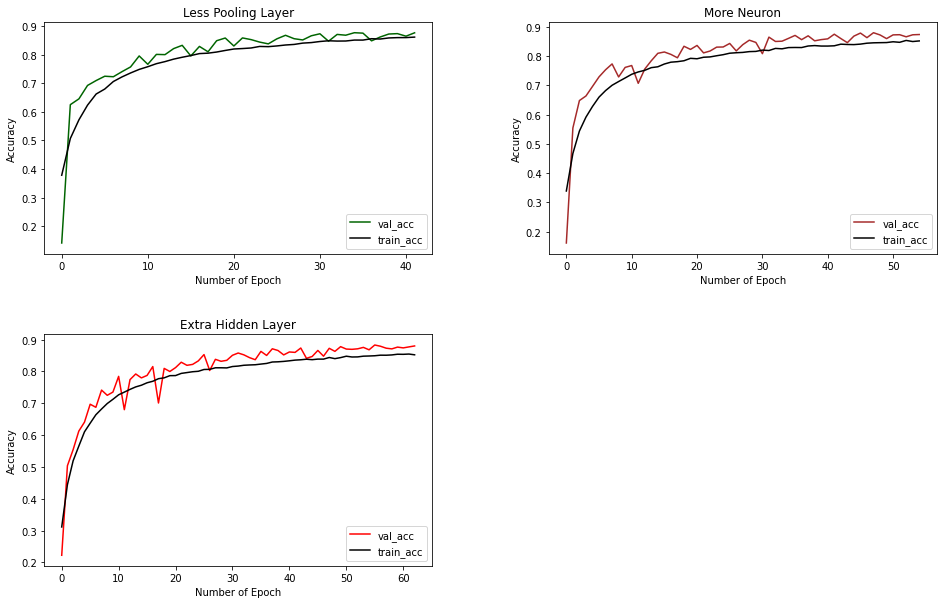

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.plot(history_4.history['val_accuracy'], color='darkgreen', label='val_acc')
plt.plot(history_4.history['accuracy'], color='black', label='train_acc')
plt.title('Less Pooling Layer')
plt.legend(loc='lower right')
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")

plt.subplot(2,2,2)
plt.plot(history_5.history['val_accuracy'], color='brown', label='val_acc')
plt.plot(history_5.history['accuracy'], color='black', label='train_acc')
plt.title('More Neuron')
plt.legend(loc='lower right')
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")

plt.subplot(2,2,3)
plt.plot(history_6.history['val_accuracy'], color='red', label='val_acc')
plt.plot(history_6.history['accuracy'], color='black', label='train_acc')
plt.title('Extra Hidden Layer')
plt.legend(loc='lower right');
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")

plt.subplots_adjust(wspace=0.30, hspace=0.35)

In [ ]:
methods = ["Without Dropout/BatchNorm/DataAug", 
           "Without Dropout/BatchNorm, With DataAug", 
           "Without Dropout, With BatchNorm/DataAug", 
           "With Dropout/BatchNorm/DataAug",
           "Less Pooling Layer",
           "More Neuron",
           "Extra Hidden Layer"]
accuracy_test = [modelTest,
                 model_1Test,
                 model_2Test,
                 model_3Test,
                 model_4Test,
                 model_5Test,
                 model_6Test]
                 
dictMethods = {'Methods':methods,'Accuracy':accuracy_test}
accuracy_frame = pd.DataFrame(dictMethods)
accuracy_frame


,Methods,Accuracy
0,Without Dropout/BatchNorm/DataAug,0.7700
1,"Without Dropout/BatchNorm, With DataAug",0.8321
2,"Without Dropout, With BatchNorm/DataAug",0.8419
3,With Dropout/BatchNorm/DataAug,0.8713
4,Less Pooling Layer,0.8756
5,More Neuron,0.8671
6,Extra Hidden Layer,0.8741


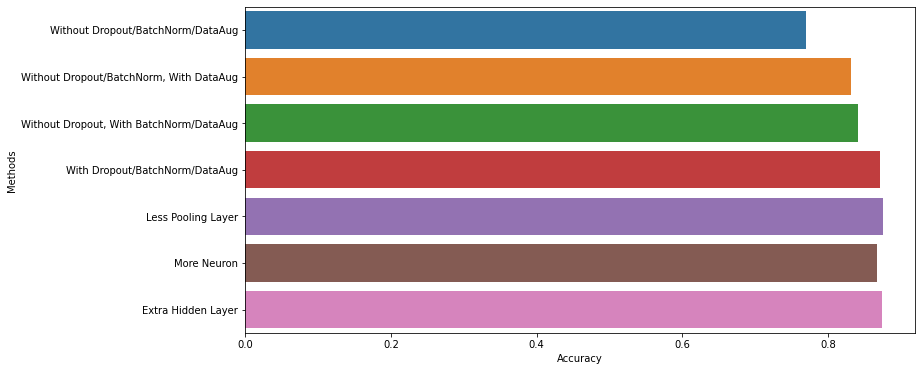

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y='Methods',x='Accuracy',data=accuracy_frame);